# Covid19 Data Analysis

**Importing Libraries**

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from mpl_toolkits import mplot3d
from matplotlib import pyplot as plt


**Reading a csv file**

In [3]:
corona_dataset = pd.read_csv('covid19_Confirmed_dataset.csv')
print(corona_dataset.head())
corona_dataset.shape #always check the shape of your datasheet tabular 

  Province/State Country/Region      Lat     Long  1/22/20  1/23/20  1/24/20  \
0            NaN    Afghanistan  33.0000  65.0000        0        0        0   
1            NaN        Albania  41.1533  20.1683        0        0        0   
2            NaN        Algeria  28.0339   1.6596        0        0        0   
3            NaN        Andorra  42.5063   1.5218        0        0        0   
4            NaN         Angola -11.2027  17.8739        0        0        0   

   1/25/20  1/26/20  1/27/20  ...  4/21/20  4/22/20  4/23/20  4/24/20  \
0        0        0        0  ...     1092     1176     1279     1351   
1        0        0        0  ...      609      634      663      678   
2        0        0        0  ...     2811     2910     3007     3127   
3        0        0        0  ...      717      723      723      731   
4        0        0        0  ...       24       25       25       25   

   4/25/20  4/26/20  4/27/20  4/28/20  4/29/20  4/30/20  
0     1463     1531   

(266, 104)

**Deleting the useless columns**

In [4]:
df = corona_dataset.drop(['Lat','Long'], axis= 1, inplace = True ) 

**Aggregating the rows by country name**

In [5]:
corona_dataset_agg = corona_dataset.groupby('Country/Region').sum()
corona_dataset_agg

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
Albania,0,0,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
Algeria,0,0,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
Andorra,0,0,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
Angola,0,0,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,...,466,474,480,484,342,342,342,343,344,344
Western Sahara,0,0,0,0,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,6,6
Yemen,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,6,6


**Visualizing data related to different countries**

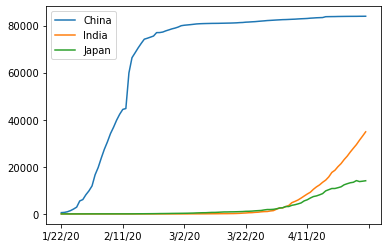

In [6]:
corona_dataset_agg.loc['China'].plot()
corona_dataset_agg.loc['India'].plot()
corona_dataset_agg.loc['Japan'].plot()
plt.legend()

**Calculating a good measure**

expresses the rate of virus spread in a country in terms of numbers

15136.0

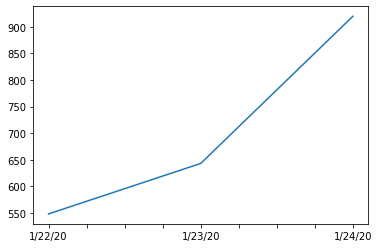

In [7]:
corona_dataset_agg.loc['China'][:3].plot()
corona_dataset_agg.loc['China'].diff().max()

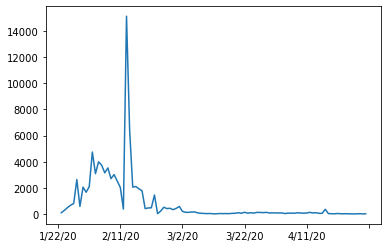

In [8]:
corona_dataset_agg.loc['China'].diff().plot()

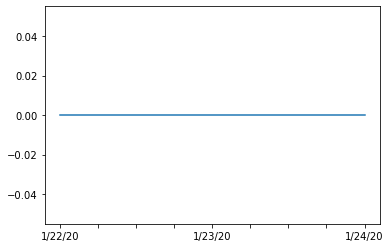

In [9]:
corona_dataset_agg.loc['India'][:3].plot()

**First derivate will give the maximum infection rate**

In [10]:
countries = list(corona_dataset_agg.index)

max_infection_rates = []
for i in countries:
    max_infection_rates.append(corona_dataset_agg.loc[i].diff().max())
corona_dataset_agg['max infection rate'] = max_infection_rates
corona_dataset_agg

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,max infection rate
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1176,1279,1351,1463,1531,1703,1828,1939,2171,232.0
Albania,0,0,0,0,0,0,0,0,0,0,...,634,663,678,712,726,736,750,766,773,34.0
Algeria,0,0,0,0,0,0,0,0,0,0,...,2910,3007,3127,3256,3382,3517,3649,3848,4006,199.0
Andorra,0,0,0,0,0,0,0,0,0,0,...,723,723,731,738,738,743,743,743,745,43.0
Angola,0,0,0,0,0,0,0,0,0,0,...,25,25,25,25,26,27,27,27,27,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,...,474,480,484,342,342,342,343,344,344,66.0
Western Sahara,0,0,0,0,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,6,4.0
Yemen,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,6,6,5.0


In [11]:
#creating a new dataframe with the only reuqired column
corona_infection_data = pd.DataFrame(corona_dataset_agg['max infection rate'])

In [12]:
corona_infection_data.head()

,max infection rate
Country/Region,
Afghanistan,232.0
Albania,34.0
Algeria,199.0
Andorra,43.0
Angola,5.0


**Reading the next csv file**

In [13]:
world_happiness = pd.read_csv('worldwide_happiness_report.csv')
world_happiness.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


**Removing the useless columns**

In [14]:
world_happiness.set_index(['Country or region'],inplace=True)

In [15]:
df1 = world_happiness.drop(['Score','Generosity','Overall rank','Perceptions of corruption'],axis = "columns", inplace=True)

In [16]:
world_happiness.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country or region,,,,
Finland,1.340,1.587,0.986,0.596
Denmark,1.383,1.573,0.996,0.592
Norway,1.488,1.582,1.028,0.603
Iceland,1.380,1.624,1.026,0.591
Netherlands,1.396,1.522,0.999,0.557


**Reading the next csv file**

In [17]:
covid_death = pd.read_csv('covid19_deaths_dataset.csv')
covid_death.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,36,40,42,43,47,50,57,58,60,64
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,26,27,27,27,27,28,28,30,30,31
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,392,402,407,415,419,425,432,437,444,450
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,37,37,37,40,40,40,40,41,42,42
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2


**Removing the useless columns**

In [18]:
df2 = covid_death.drop(['Lat','Long'], axis=1, inplace= True)

**Aggregating the rows by column name**

In [19]:
covid_death_agg = covid_death.groupby('Country/Region').sum()
covid_death_agg.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,36,40,42,43,47,50,57,58,60,64
Albania,0,0,0,0,0,0,0,0,0,0,...,26,27,27,27,27,28,28,30,30,31
Algeria,0,0,0,0,0,0,0,0,0,0,...,392,402,407,415,419,425,432,437,444,450
Andorra,0,0,0,0,0,0,0,0,0,0,...,37,37,37,40,40,40,40,41,42,42
Angola,0,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2


In [20]:
covid_death_agg.shape

(187, 100)

**Visualizing the data**

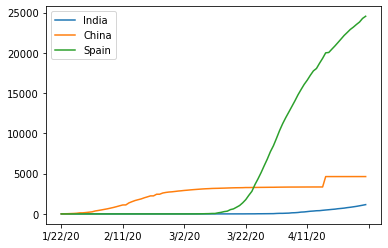

In [21]:
covid_death_agg.loc['India'].plot()
covid_death_agg.loc['China'].plot()
covid_death_agg.loc['Spain'].plot()
plt.legend()

**Calculating first derivative of the curve**

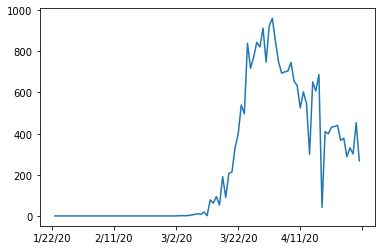

In [22]:
covid_death_agg.loc['Spain'].diff().plot()

**Finding the maximum death rate**

In [23]:
covid_death_agg.loc['Spain'].diff().max()

961.0

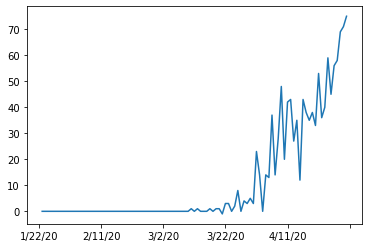

In [24]:
covid_death_agg.loc['India'].diff().plot()

In [25]:
covid_death_agg.loc['India'].diff().max()

75.0

In [26]:
countries1 = list(covid_death_agg.index)
max_death_rates = []
for i in countries1:
    max_death_rates.append(covid_death_agg.loc[i].diff().max())
covid_death_agg['max death rate']= max_death_rates

In [27]:
covid_death_agg.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,max death rate
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,40,42,43,47,50,57,58,60,64,7.0
Albania,0,0,0,0,0,0,0,0,0,0,...,27,27,27,27,28,28,30,30,31,4.0
Algeria,0,0,0,0,0,0,0,0,0,0,...,402,407,415,419,425,432,437,444,450,30.0
Andorra,0,0,0,0,0,0,0,0,0,0,...,37,37,40,40,40,40,41,42,42,4.0
Angola,0,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2.0


In [48]:
corona_death_data = pd.DataFrame(covid_death_agg['max death rate'])

In [49]:
corona_death_data.head()

,max death rate
Country/Region,
Afghanistan,7.0
Albania,4.0
Algeria,30.0
Andorra,4.0
Angola,2.0


**Joining the data**

In [50]:
corona_infection_data.shape

(187, 1)

In [51]:
corona_death_data.shape

(187, 1)

In [52]:
join_data = world_happiness.join(corona_infection_data, how='inner')
join_data

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,max infection rate
Finland,1.340,1.587,0.986,0.596,267.0
Denmark,1.383,1.573,0.996,0.592,391.0
Norway,1.488,1.582,1.028,0.603,386.0
Iceland,1.380,1.624,1.026,0.591,99.0
Netherlands,1.396,1.522,0.999,0.557,1346.0
...,...,...,...,...,...
Rwanda,0.359,0.711,0.614,0.555,22.0
Tanzania,0.476,0.885,0.499,0.417,181.0
Afghanistan,0.350,0.517,0.361,0.000,232.0
Central African Republic,0.026,0.000,0.105,0.225,31.0


In [53]:
final_data = join_data.join(corona_death_data, how='inner')
final_data

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,max infection rate,max death rate
Finland,1.340,1.587,0.986,0.596,267.0,43.0
Denmark,1.383,1.573,0.996,0.592,391.0,22.0
Norway,1.488,1.582,1.028,0.603,386.0,16.0
Iceland,1.380,1.624,1.026,0.591,99.0,5.0
Netherlands,1.396,1.522,0.999,0.557,1346.0,234.0
...,...,...,...,...,...,...
Rwanda,0.359,0.711,0.614,0.555,22.0,0.0
Tanzania,0.476,0.885,0.499,0.417,181.0,6.0
Afghanistan,0.350,0.517,0.361,0.000,232.0,7.0
Central African Republic,0.026,0.000,0.105,0.225,31.0,0.0


**Creating a correlation matrix**

In [54]:
final_data.corr()
# it is representing the currelation between every two columns of our dataset 

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,max infection rate,max death rate
GDP per capita,1.000000,0.759468,0.863062,0.394603,0.250118,0.259893
Social support,0.759468,1.000000,0.765286,0.456246,0.191958,0.204148
Healthy life expectancy,0.863062,0.765286,1.000000,0.427892,0.289263,0.309666
Freedom to make life choices,0.394603,0.456246,0.427892,1.000000,0.078196,0.080166
max infection rate,0.250118,0.191958,0.289263,0.078196,1.000000,0.880597
max death rate,0.259893,0.204148,0.309666,0.080166,0.880597,1.000000


In [55]:
final_data.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,max infection rate,max death rate
Finland,1.340,1.587,0.986,0.596,267.0,43.0
Denmark,1.383,1.573,0.996,0.592,391.0,22.0
Norway,1.488,1.582,1.028,0.603,386.0,16.0
Iceland,1.380,1.624,1.026,0.591,99.0,5.0
Netherlands,1.396,1.522,0.999,0.557,1346.0,234.0


**Visualization of the result**

**Plotting GDP vs maximum Infection rate**

C:\Users\ibutt\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


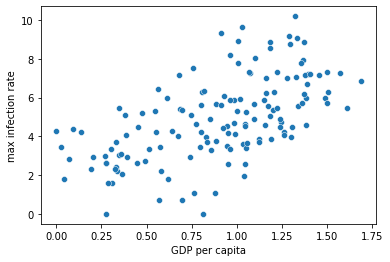

In [56]:
x = final_data['GDP per capita']
y = final_data['max infection rate']
sns.scatterplot(x, np.log(y))

C:\Users\ibutt\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ibutt\anaconda3\lib\site-packages\numpy\linalg\linalg.py:1965: RuntimeWarning: invalid value encountered in greater
  large = s > cutoff


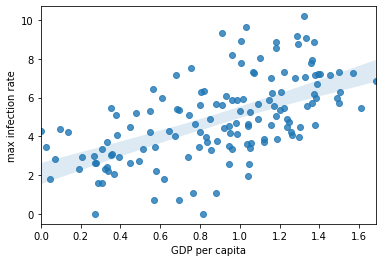

In [57]:
sns.regplot(x,np.log(y))

**Plotting Social support Vs max infection rate**

C:\Users\ibutt\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


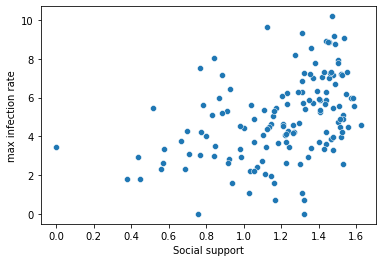

In [58]:
xs = final_data['Social support']
ys = final_data['max infection rate']

sns.scatterplot(xs,np.log(ys))

C:\Users\ibutt\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ibutt\anaconda3\lib\site-packages\numpy\linalg\linalg.py:1965: RuntimeWarning: invalid value encountered in greater
  large = s > cutoff


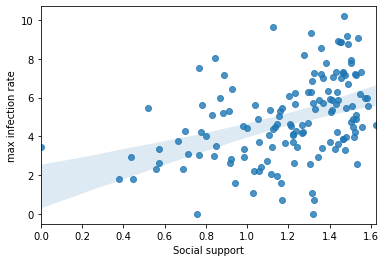

In [59]:
sns.regplot(xs,np.log(ys))

**Plotting Health Life Expectancy Vs max infection rate**

C:\Users\ibutt\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


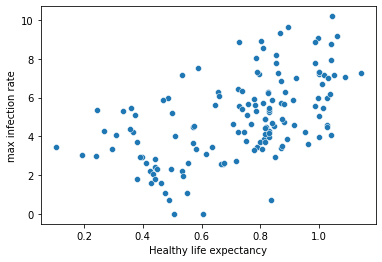

In [60]:
xs = final_data['Healthy life expectancy']
ys = final_data['max infection rate']

sns.scatterplot(xs,np.log(ys))

C:\Users\ibutt\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ibutt\anaconda3\lib\site-packages\numpy\linalg\linalg.py:1965: RuntimeWarning: invalid value encountered in greater
  large = s > cutoff


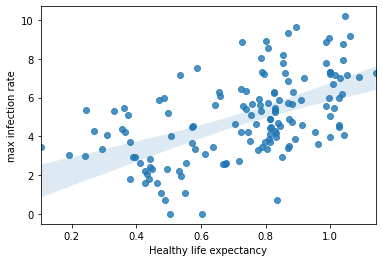

In [61]:
sns.regplot(xs,np.log(ys))

**Plotting Freedom to make life choices Vs max infection rate**

C:\Users\ibutt\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


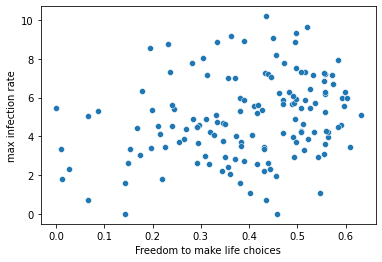

In [62]:
xs = final_data['Freedom to make life choices']
ys = final_data['max infection rate']

sns.scatterplot(xs,np.log(ys))

C:\Users\ibutt\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


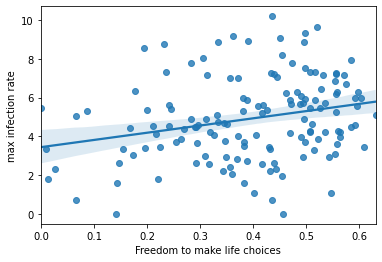

In [63]:
sns.regplot(xs,np.log(ys))